# Import Libraries


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize


from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# **Question 4)**


**1) Load and Inspect Data**

**Part 1)EDA**

In [2]:
# https://drive.google.com/file/d/1FsRP6xViUz8Etw4w90uQSNu_2zgF40z6/view?usp=sharing
!pip install gdown
import gdown

file_id = "1FsRP6xViUz8Etw4w90uQSNu_2zgF40z6"
url = f"https://drive.google.com/uc?id={file_id}"
output = "teleCust1000t.csv"
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1FsRP6xViUz8Etw4w90uQSNu_2zgF40z6
To: /content/teleCust1000t.csv
100%|██████████| 37.0k/37.0k [00:00<00:00, 68.8MB/s]


'teleCust1000t.csv'

In [3]:
df = pd.read_csv("teleCust1000t.csv")

print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nDescribe (numeric):")
print(df.describe())

print("\nHead:")
print(df.head())

Shape: (1000, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None

Describe (numeric):
          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816 

**2) Check for Missing Values**


In [4]:
missing_counts = df.isna().sum()
print("\nMissing values per column:\n", missing_counts)



Missing values per column:
 region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


**3) Identify Feature Types**


In [5]:
target_col = "custcat"
all_features = [c for c in df.columns if c != target_col]

# In this dataset, all columns are numeric-coded; treat some as categorical/binary by semantics.
numeric_cols = ["tenure", "age", "address", "income", "ed", "employ", "reside"]
categorical_like_cols = ["region", "marital", "retire", "gender"]

# Validate presence (robustness in case of column variations)
numeric_cols = [c for c in numeric_cols if c in df.columns]
categorical_like_cols = [c for c in categorical_like_cols if c in df.columns]

print("\nNumeric features:", numeric_cols)
print("Categorical-like features:", categorical_like_cols)
print("Target:", target_col)



Numeric features: ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'reside']
Categorical-like features: ['region', 'marital', 'retire', 'gender']
Target: custcat


**4) Data Visualization**


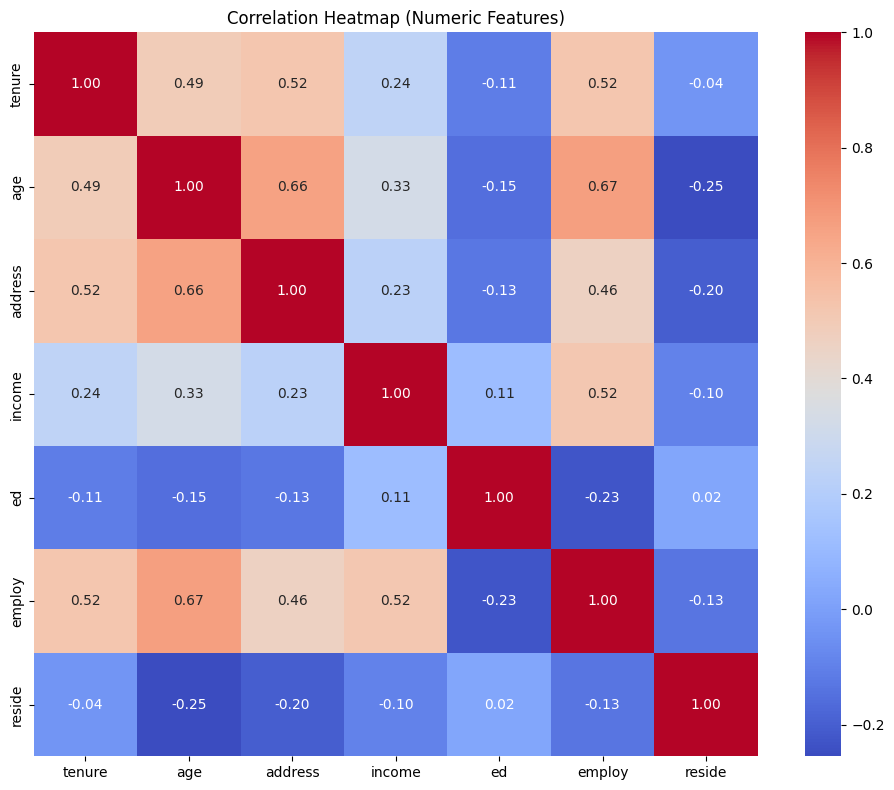

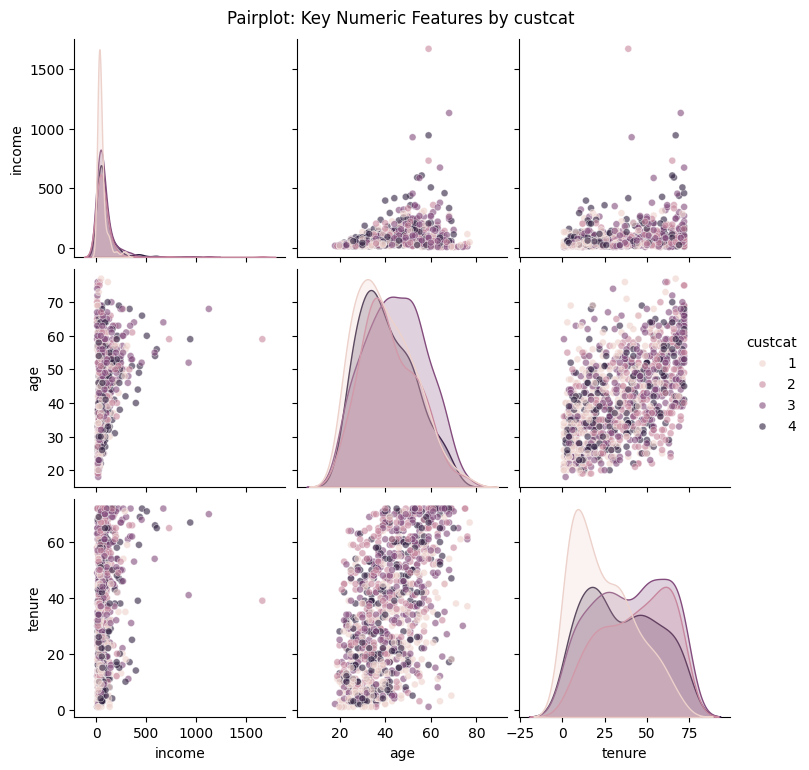

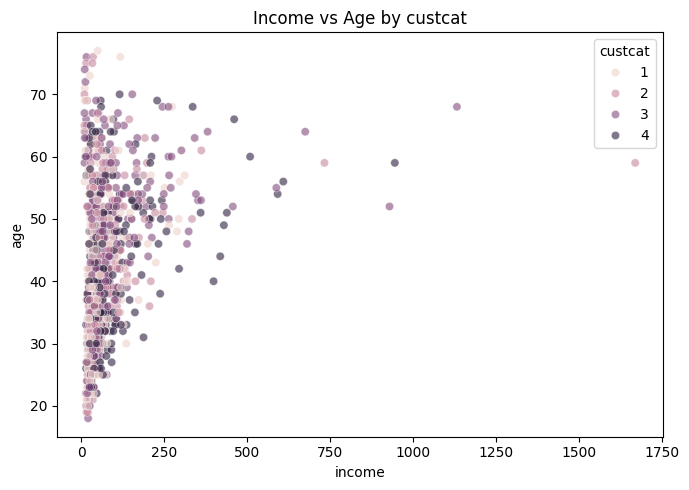

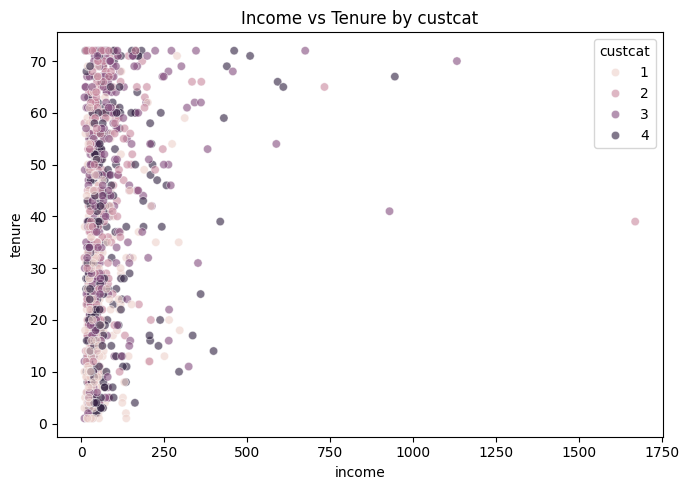

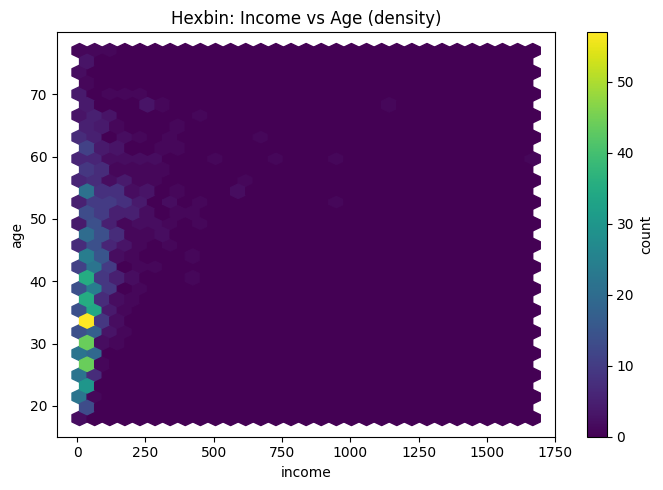

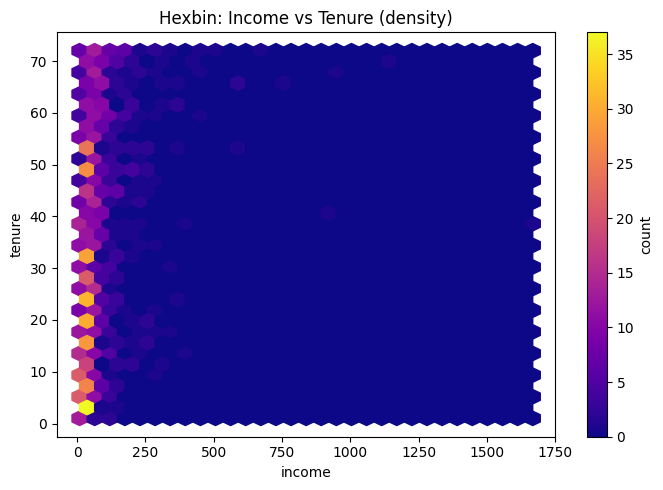

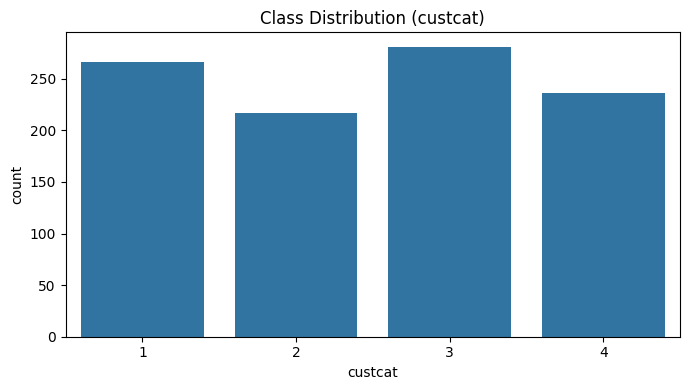

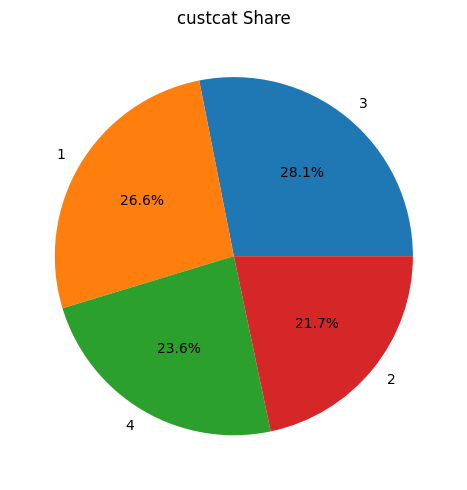

In [6]:
# 4a) Correlation heatmap (numeric columns only)
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

# 4b) Pair/scatter plots for key features vs target hue
key_numeric = [c for c in ["income", "age", "tenure"] if c in df.columns]
if len(key_numeric) >= 2:
    sns.pairplot(df, vars=key_numeric, hue=target_col, plot_kws={"alpha": 0.6, "s": 25})
    plt.suptitle("Pairplot: Key Numeric Features by custcat", y=1.02)
    plt.show()

# Additional scatter plots colored by custcat
if set(["income", "age"]).issubset(df.columns):
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x="income", y="age", hue=target_col, alpha=0.6)
    plt.title("Income vs Age by custcat")
    plt.tight_layout()
    plt.show()

if set(["income", "tenure"]).issubset(df.columns):
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x="income", y="tenure", hue=target_col, alpha=0.6)
    plt.title("Income vs Tenure by custcat")
    plt.tight_layout()
    plt.show()

# 4c) Hexbin plots (matplotlib) for dense numeric pairs
if set(["income", "age"]).issubset(df.columns):
    plt.figure(figsize=(7,5))
    plt.hexbin(df["income"], df["age"], gridsize=30, cmap="viridis")
    cb = plt.colorbar()
    cb.set_label("count")
    plt.xlabel("income")
    plt.ylabel("age")
    plt.title("Hexbin: Income vs Age (density)")
    plt.tight_layout()
    plt.show()

if set(["income", "tenure"]).issubset(df.columns):
    plt.figure(figsize=(7,5))
    plt.hexbin(df["income"], df["tenure"], gridsize=30, cmap="plasma")
    cb = plt.colorbar()
    cb.set_label("count")
    plt.xlabel("income")
    plt.ylabel("tenure")
    plt.title("Hexbin: Income vs Tenure (density)")
    plt.tight_layout()
    plt.show()

# 4d) Class distribution: countplot and pie chart
plt.figure(figsize=(7,4))
sns.countplot(x=target_col, data=df)
plt.title("Class Distribution (custcat)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
df[target_col].value_counts().plot(kind="pie", autopct="%1.1f%%", ylabel="")
plt.title("custcat Share")
plt.tight_layout()
plt.show()


**5) Missing-data handling: compare mean vs median vs most_frequent imputation**


In [7]:
X = df[all_features].copy()
y = df[target_col].copy()

# Strategy-specific imputers: apply per type
def make_pipeline(impute_num_strategy, impute_cat_strategy):
    from sklearn.compose import ColumnTransformer
    num_imputer = SimpleImputer(strategy=impute_num_strategy)
    cat_imputer = SimpleImputer(strategy=impute_cat_strategy)
    pre = ColumnTransformer(
        transformers=[
            ("num", Pipeline([("imputer", num_imputer), ("scaler", StandardScaler())]), numeric_cols),
            ("cat", Pipeline([("imputer", cat_imputer)]), categorical_like_cols),
        ],
        remainder="drop"
    )
    model = KNeighborsClassifier(n_neighbors=7, weights="distance")
    pipe = Pipeline([("prep", pre), ("clf", model)])
    return pipe

strategies = [
    ("mean", "most_frequent"),
    ("median", "most_frequent"),
    ("most_frequent", "most_frequent"),
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for num_strat, cat_strat in strategies:
    pipe = make_pipeline(num_strat, cat_strat)
    scores = cross_val_score(pipe, X, y, cv=cv, scoring="accuracy")
    results.append((num_strat, cat_strat, scores.mean(), scores.std()))

print("\nImputation strategy comparison (5-fold CV accuracy):")
for r in results:
    print(f"Numeric={r[0]:>13} | Categorical={r[1]:>13} | Acc={r[2]:.4f} ± {r[3]:.4f}")



Imputation strategy comparison (5-fold CV accuracy):
Numeric=         mean | Categorical=most_frequent | Acc=0.3430 ± 0.0294
Numeric=       median | Categorical=most_frequent | Acc=0.3430 ± 0.0294
Numeric=most_frequent | Categorical=most_frequent | Acc=0.3430 ± 0.0294


**6) Simple train/test evaluation with the best imputer (choose the highest mean CV)**

In [9]:
best_idx = int(np.argmax([r[2] for r in results]))
best_num, best_cat = strategies[best_idx][:2]
best_pipe = make_pipeline(best_num, best_cat)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

best_pipe.fit(X_train, y_train)
y_pred = best_pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\nHold-out accuracy with best imputation (num={best_num}, cat={best_cat}): {acc:.4f}")




Hold-out accuracy with best imputation (num=mean, cat=most_frequent): 0.3160


**7) Optional: Quick Plotly visualization (interactive)**

In [10]:
if set(["income","age",target_col]).issubset(df.columns):
    fig = px.scatter(df, x="income", y="age", color=target_col, opacity=0.65,
                     title="Income vs Age by custcat (Interactive)")
    fig.show()


**Part2) Pre processing data set**

In [12]:
# Define columns
target_col = "custcat"
numeric_cols = [c for c in ["tenure","age","address","income","ed","employ","reside"] if c in df.columns]
categorical_like_cols = [c for c in ["region","marital","retire","gender"] if c in df.columns]

# Separate X, y
X = df.drop(columns=[target_col])
y = df[target_col]


# Imputers (robust default: median for numeric, most_frequent for categorical-like)
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Encoders and scalers
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

numeric_pipe = Pipeline(steps=[
    ("imputer", num_imputer),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", cat_imputer),
    ("onehot", ohe)
])

# Build the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, numeric_cols),
        ("cat", categorical_pipe, categorical_like_cols),
    ],
    remainder="drop"
)

# Fit and transform
X_prepared = preprocessor.fit_transform(X)

# Retrieve feature names (for inspection/reporting)
num_features_names = numeric_cols
cat_feature_names = preprocessor.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(categorical_like_cols).tolist()
all_feature_names = num_features_names + cat_feature_names

print("Prepared matrix shape:", X_prepared.shape)
print("First 5 engineered features:", all_feature_names[:5])

Prepared matrix shape: (1000, 16)
First 5 engineered features: ['tenure', 'age', 'address', 'income', 'ed']


In [14]:
# Correlation among numeric features only
corr = df[numeric_cols].corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

print("Highly correlated numeric features to consider dropping:", to_drop)

# If any to drop, rebuild transformer excluding them
reduced_numeric_cols = [c for c in numeric_cols if c not in to_drop]

numeric_pipe_reduced = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor_reduced = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe_reduced, reduced_numeric_cols),
        ("cat", categorical_pipe, categorical_like_cols),
    ],
    remainder="drop"
)

X_prepared_reduced = preprocessor_reduced.fit_transform(X)
print("Reduced prepared matrix shape:", X_prepared_reduced.shape)

Highly correlated numeric features to consider dropping: []
Reduced prepared matrix shape: (1000, 16)


**Section 3: Feature Selection and Model Building**

In [24]:
# Preprocessing
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, numeric_cols),
        ("cat", cat_pipe, categorical_like_cols)
    ],
    remainder="drop"
)

# Train/test split with stratification
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Fit preprocessor on training set only
preprocessor.fit(X_train_raw)
X_train = preprocessor.transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# Retrieve engineered feature names for interpretability
num_feature_names = numeric_cols
cat_feature_names = preprocessor.named_transformers_["cat"].named_steps["onehot"] \
    .get_feature_names_out(categorical_like_cols).tolist()
feature_names = num_feature_names + cat_feature_names
# Fit preprocessor on full data (for visualization/exploration)
X_all = preprocessor.fit_transform(X)

**Method 1: Lasso-based selection**

In [25]:
from sklearn.model_selection import GridSearchCV

logreg_l1 = LogisticRegression(
    penalty="l1",
    solver="saga",
    max_iter=5000,
    multi_class="ovr",
    n_jobs=-1
)

param_grid = {"C": np.logspace(-2, 2, 9)}
grid_l1 = GridSearchCV(logreg_l1, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_l1.fit(X_train, y_train)
best_l1 = grid_l1.best_estimator_

# Determine selected features if any class assigns non-zero coefficient
coefs = np.abs(best_l1.coef_)  # shape: [n_classes, n_features]
nonzero_mask = (coefs > 1e-8).any(axis=0)
lasso_selected_features = [f for f, keep in zip(feature_names, nonzero_mask) if keep]
print("Lasso-selected features (L1-LogReg OVR):", lasso_selected_features)
print("Lasso-selected count:", len(lasso_selected_features))

Lasso-selected features (L1-LogReg OVR): ['tenure', 'age', 'income', 'ed', 'employ', 'reside', 'region_1.0', 'region_2.0', 'retire_0.0', 'retire_1.0', 'gender_0.0', 'gender_1.0']
Lasso-selected count: 12


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



**Method 2: RFE with Logistic Regression**

In [26]:
p = X_train.shape[1]
k = min(15, p)

base_lr = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    max_iter=5000,
    multi_class="multinomial",
    n_jobs=-1
)

rfe = RFE(estimator=base_lr, n_features_to_select=k, step=1)
rfe.fit(X_train, y_train)
rfe_mask = rfe.support_
rfe_selected_features = [f for f, keep in zip(feature_names, rfe_mask) if keep]
print("RFE-selected features:", rfe_selected_features)
print("RFE-selected count:", len(rfe_selected_features))


RFE-selected features: ['tenure', 'age', 'income', 'ed', 'employ', 'reside', 'region_1.0', 'region_2.0', 'region_3.0', 'marital_0.0', 'marital_1.0', 'retire_0.0', 'retire_1.0', 'gender_0.0', 'gender_1.0']
RFE-selected count: 15


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



**Compare selections**

In [27]:
overlap = sorted(set(lasso_selected_features).intersection(rfe_selected_features))
only_lasso = sorted(set(lasso_selected_features) - set(rfe_selected_features))
only_rfe = sorted(set(rfe_selected_features) - set(lasso_selected_features))

print("\nOverlap features:", overlap)
print("Only Lasso:", only_lasso)
print("Only RFE:", only_rfe)


Overlap features: ['age', 'ed', 'employ', 'gender_0.0', 'gender_1.0', 'income', 'region_1.0', 'region_2.0', 'reside', 'retire_0.0', 'retire_1.0', 'tenure']
Only Lasso: []
Only RFE: ['marital_0.0', 'marital_1.0', 'region_3.0']



**Build Logistic Regression with selected features**

---


**Choose one of the selections; try both and compare**


In [28]:
def indices_from_names(names, all_names):
    idx = [all_names.index(n) for n in names]
    return idx

lasso_idx = indices_from_names(lasso_selected_features, feature_names) if len(lasso_selected_features) > 0 else list(range(p))
rfe_idx = indices_from_names(rfe_selected_features, feature_names)

def train_eval_lr(Xtr, Xte, ytr, yte, selected_idx, label):
    lr = LogisticRegression(
        penalty="l2",
        solver="lbfgs",
        max_iter=5000,
        multi_class="multinomial",
        n_jobs=-1
    )
    lr.fit(Xtr[:, selected_idx], ytr)
    ytr_pred = lr.predict(Xtr[:, selected_idx])
    yte_pred = lr.predict(Xte[:, selected_idx])
    train_acc = accuracy_score(ytr, ytr_pred)
    test_acc = accuracy_score(yte, yte_pred)
    print(f"\n{label} -> Train acc: {train_acc:.4f} | Test acc: {test_acc:.4f}")
    return lr, yte_pred

# Train/evaluate with Lasso-selected features
lr_lasso, y_pred_lasso = train_eval_lr(X_train, X_test, y_train, y_test, lasso_idx, "LogReg using Lasso-selected")

# Train/evaluate with RFE-selected features
lr_rfe, y_pred_rfe = train_eval_lr(X_train, X_test, y_train, y_test, rfe_idx, "LogReg using RFE-selected")



LogReg using Lasso-selected -> Train acc: 0.4413 | Test acc: 0.3880

LogReg using RFE-selected -> Train acc: 0.4320 | Test acc: 0.3880


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



**Confusion Matrix and ROC/AUC for the preferred model**


Preferred model: Lasso-selected


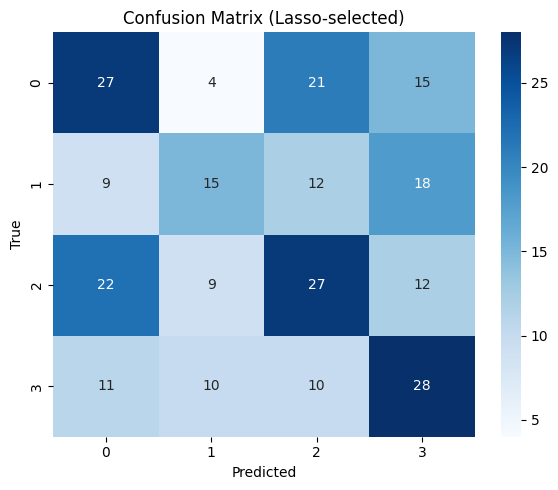

AUC (OVR, macro-average): 0.6899


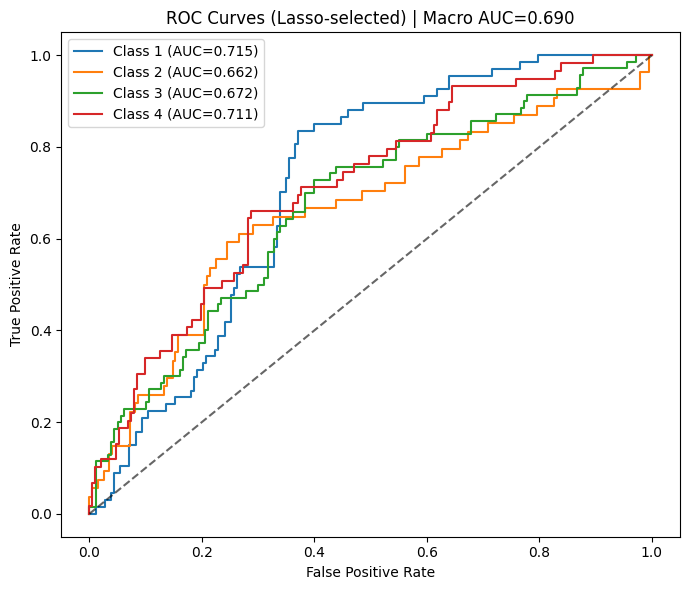

In [29]:
def pick_preferred(lr1, ypred1, lr2, ypred2, Xte, yte, idx1, idx2):
    acc1 = accuracy_score(yte, ypred1)
    acc2 = accuracy_score(yte, ypred2)
    if acc1 >= acc2:
        return "Lasso-selected", lr1, idx1
    else:
        return "RFE-selected", lr2, idx2

preferred_label, preferred_lr, preferred_idx = pick_preferred(
    lr_lasso, y_pred_lasso, lr_rfe, y_pred_rfe, X_test, y_test, lasso_idx, rfe_idx
)
print(f"\nPreferred model: {preferred_label}")

# Confusion Matrix
y_pred = preferred_lr.predict(X_test[:, preferred_idx])
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix ({preferred_label})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# ROC and AUC (One-vs-Rest)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = preferred_lr.predict_proba(X_test[:, preferred_idx])

# Macro-average AUC
auc_macro = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
print(f"AUC (OVR, macro-average): {auc_macro:.4f}")

# Plot per-class ROC
plt.figure(figsize=(7,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC={roc_auc_score(y_test_bin[:, i], y_score[:, i]):.3f})")
plt.plot([0,1],[0,1],"k--", alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curves ({preferred_label}) | Macro AUC={auc_macro:.3f}")
plt.legend()
plt.tight_layout()
plt.show()


**Coefficient analysis: feature impact**



Top features by absolute coefficient magnitude:
   feature  abs_coef_max
    tenure      0.712731
        ed      0.634393
retire_1.0      0.374525
retire_0.0      0.368903
region_1.0      0.286745
       age      0.210436
    income      0.202750
    reside      0.195662
region_2.0      0.120634
gender_0.0      0.082406
gender_1.0      0.076784
    employ      0.067369


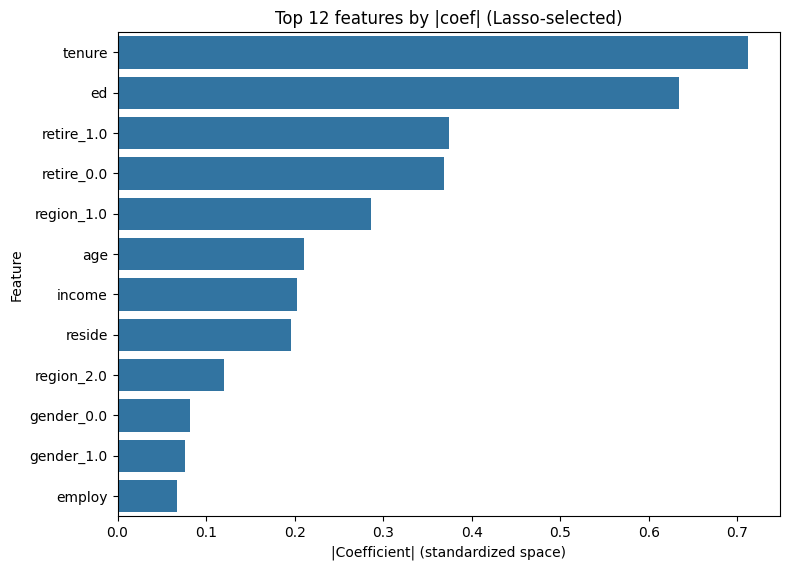

In [30]:
coef_matrix = preferred_lr.coef_  # shape [C, K]
abs_max_across_classes = np.abs(coef_matrix).max(axis=0)

selected_feature_names = [feature_names[i] for i in preferred_idx]
impact_df = pd.DataFrame({
    "feature": selected_feature_names,
    "abs_coef_max": abs_max_across_classes
}).sort_values("abs_coef_max", ascending=False)

print("\nTop features by absolute coefficient magnitude:")
print(impact_df.head(15).to_string(index=False))

# Optional: visualize top coefficients
top_k = min(15, len(impact_df))
plt.figure(figsize=(8, 0.4 * top_k + 1))
sns.barplot(data=impact_df.head(top_k), x="abs_coef_max", y="feature", orient="h", color="#1f77b4")
plt.title(f"Top {top_k} features by |coef| ({preferred_label})")
plt.xlabel("|Coefficient| (standardized space)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**PCA to 2D**

PCA explained variance ratios: [0.34295012 0.14420531]
PCA total explained variance (2D): 0.48715542999972256


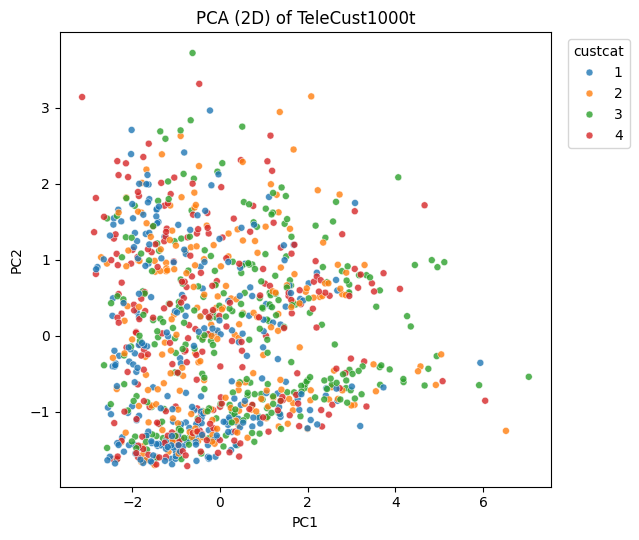

In [31]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_all)

print("PCA explained variance ratios:", pca.explained_variance_ratio_)
print("PCA total explained variance (2D):", pca.explained_variance_ratio_.sum())

plt.figure(figsize=(6.5,5.5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="tab10", s=25, alpha=0.8)
plt.title("PCA (2D) of TeleCust1000t")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="custcat", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()

**LDA to 2D (supervised)**

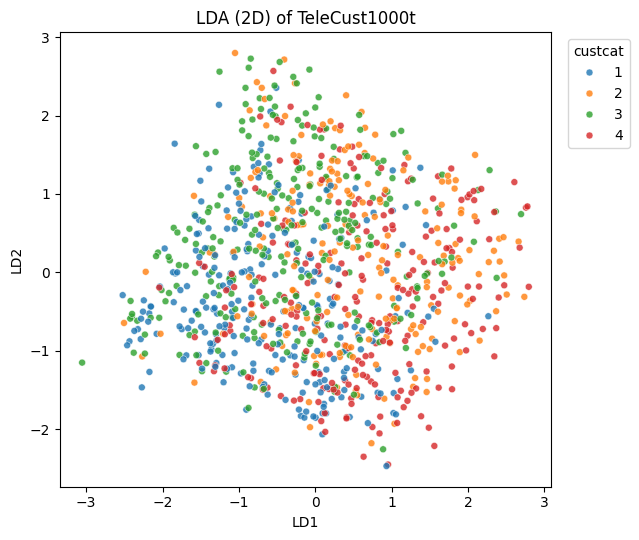

In [32]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_all, y)

plt.figure(figsize=(6.5,5.5))
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=y, palette="tab10", s=25, alpha=0.8)
plt.title("LDA (2D) of TeleCust1000t")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(title="custcat", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()


**MLP bottleneck (nonlinear 2D embedding)**

In [38]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert data to tensors
y_train_tensor = torch.tensor(y_train.values - 1)
y_test_tensor  = torch.tensor(y_test.values - 1)

X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test.values)

# DataLoader
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

# Define model
class MLP(nn.Module):
    def __init__(self, input_dim, output_classes=4):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4_embedding = nn.Linear(32, 2)
        self.out = nn.Linear(2, output_classes)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.relu(self.fc3(x))
        z = self.fc4_embedding(x)
        y = self.out(z)
        return y, z

# Training loop for one epoch
def train_one_epoch(model, train_loader, loss_fn, optimizer, epoch=None):
    model.train()
    loss_train = []
    with tqdm(train_loader, unit="batch") as tepoch:
        for inputs, targets in tepoch:
            if epoch is not None:
                tepoch.set_description(f"Epoch {epoch}")
            inputs, targets = inputs.to(device), targets.to(device)

            outputs, _ = model(inputs)
            loss = loss_fn(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train.append(loss.item())
            avg_loss = sum(loss_train) / len(loss_train)
            tepoch.set_postfix(loss=avg_loss)
    return model

# ✅ Create and train model
model = MLP(X_train.shape[1], 4).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 300
for epoch in range(1, epochs + 1):
    train_one_epoch(model, train_loader, criterion, optimizer, epoch)


Epoch 300: 100%|██████████| 24/24 [00:00<00:00, 145.17batch/s, loss=0.628]


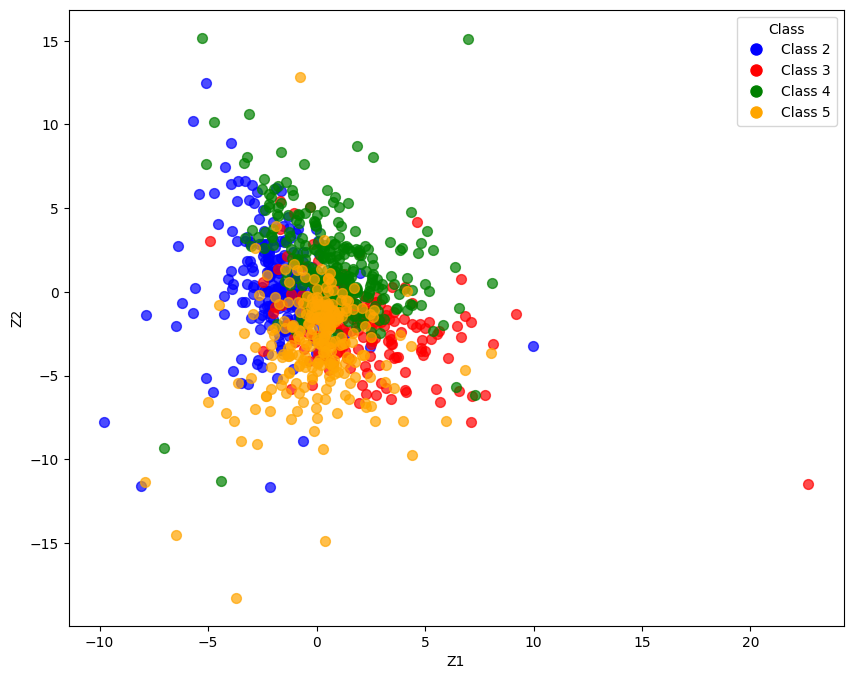

In [39]:
_,Z_train = model(X_train_tensor.to(device))
Z_train = Z_train.cpu().detach().numpy()
_, Z_test = model(X_test_tensor.to(device))
Z_test = Z_test.cpu().detach().numpy()

Z_combined = np.concatenate((Z_train, Z_test), axis=0)

y_combined = np.concatenate((y_train, y_test), axis=0)

plt.figure(figsize=(10, 8))
classes = np.unique(y_combined)
colors = ['blue', 'red', 'green', 'orange']
legend_handles = []

for i, class_label in enumerate(classes):
    class_mask = (y_combined == class_label)

    plt.scatter(Z_combined[class_mask, 0], Z_combined[class_mask, 1],
                c=colors[i],
                marker='o',
                s=50,
                alpha=0.7)

    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Class {class_label+1}',
                                     markerfacecolor=colors[i], markersize=10))

plt.legend(handles=legend_handles,
           title="Class",
           loc="upper right",
           frameon=True)

plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()